In [1]:
from PIL import Image
from matplotlib import pyplot as plt

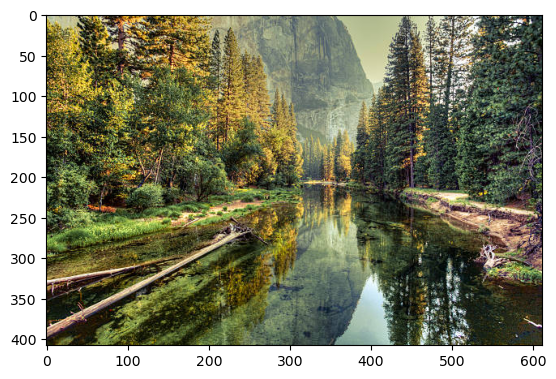

In [2]:
image = Image.open('assets/nature2.jpg')
plt.imshow(image)

In [3]:
image.size

(612, 408)

In [4]:
current_width = image.size[0]
current_height = image.size[1]
target_width = 550
target_height = current_height
print(current_width)
print(current_height)
print(target_width)
print(target_height)

612
408
550
408


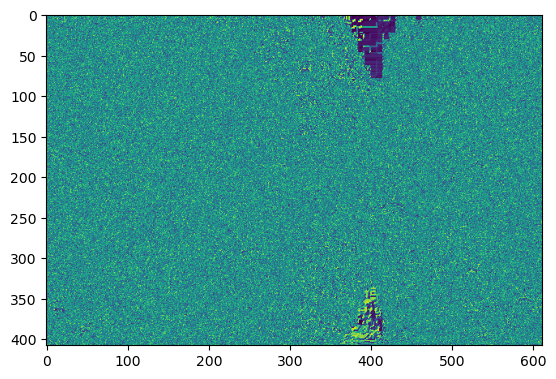

In [5]:
import numpy as np
from scipy import ndimage

sx = ndimage.sobel(image, axis = 0, mode='constant')
sy = ndimage.sobel(image, axis = 1, mode='constant')
sobel = np.absolute(sx) + np.absolute(sy)
energy = sobel.sum(axis = 2)
plt.imshow(energy)

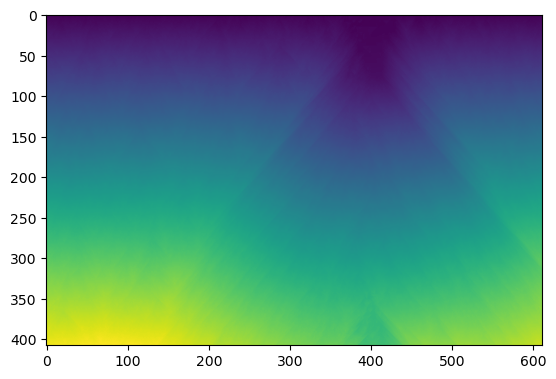

In [6]:
M = np.zeros([current_height, current_width])
# prvi red je energija piksela iz prvog reda
M[0] = energy[0]
for i in range(1, current_height):
    M[i, 0] = energy[i, 0] + min(M[i - 1, 0], M[i - 1, 1])
    M[i, current_width - 1] = energy[i, current_width - 1] + min(M[i - 1, current_width - 1], M[i - 1, current_width - 2])
    for j in range(1, current_width - 1):
        M[i, j] = energy[i, j] + min(M[i - 1, j - 1], min(M[i - 1, j], M[i - 1, j + 1]))

plt.imshow(M)

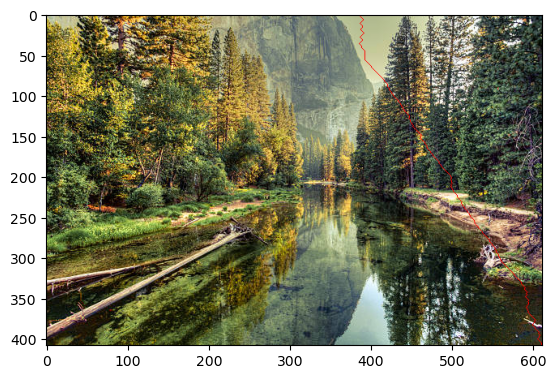

In [7]:
seam = np.zeros([current_height]).astype(int)
m = 0
for j in range(1, current_width):
    if M[current_height - 1, 0] > M[current_height - 1, j]:
        m = j
seam[current_height - 1] = m
for i in reversed(range(1, current_height)):
    j = seam[i]
    if j == 0:
        # posmatramo samo desnog suseda
        if M[i - 1, j] < M[i - 1, j + 1]:
            seam[i - 1] = j
        else:
            seam[i - 1] = j + 1
    elif j == current_width - 1:
        # posmatramo samo levog suseda
        if M[i - 1, j] < M[i - 1, j - 1]:
            seam[i - 1] = j
        else:
            seam[i - 1] = j - 1
    else:
        # posmatramo oba suseda
        m = min(M[i - 1, j - 1], min(M[i - 1, j], M[i - 1, j + 1]))
        if m == M[i - 1, j - 1]:
            seam[i - 1] = j - 1
        elif m == M[i - 1, j]:
            seam[i - 1] = j
        else:
            seam[i - 1] = j + 1

for i in range(current_height):
    image.putpixel((seam[i], i), (255, 0, 0))

plt.imshow(image)

(612, 408)


<Figure size 640x480 with 0 Axes>

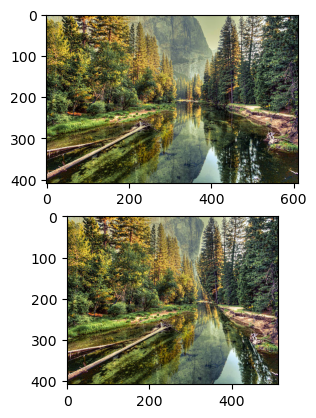

In [8]:
def seam_carving(image, target_width):
    current_width = image.size[0]
    current_height = image.size[1]
    image = np.array(image).astype(int)
    
    while current_width > target_width:
        sx = ndimage.sobel(image, axis = 0, mode='constant')
        sy = ndimage.sobel(image, axis = 1, mode='constant')
        sobel = np.absolute(sx) + np.absolute(sy)
        energy = sobel.sum(axis = 2)
        
        M = np.zeros([current_height, current_width])
        # prvi red je energija piksela iz prvog reda
        M[0] = energy[0]
        for i in range(1, current_height):
            M[i, 0] = energy[i, 0] + min(M[i - 1, 0], M[i - 1, 1])
            M[i, current_width - 1] = energy[i, current_width - 1] + min(M[i - 1, current_width - 1], M[i - 1, current_width - 2])
            for j in range(1, current_width - 1):
                M[i, j] = energy[i, j] + min(M[i - 1, j - 1], min(M[i - 1, j], M[i - 1, j + 1]))
        seam = np.zeros([current_height]).astype(int)
        m = 0
        for j in range(1, current_width):
            if M[current_height - 1, 0] > M[current_height - 1, j]:
                m = j
            seam[current_height - 1] = m
        
        for i in reversed(range(1, current_height)):
            j = seam[i]
            if j == 0:
                # posmatramo samo desnog suseda
                if M[i - 1, j] < M[i - 1, j + 1]:
                    seam[i - 1] = j
                else:
                    seam[i - 1] = j + 1
            elif j == current_width - 1:
                # posmatramo samo levog suseda
                if M[i - 1, j] < M[i - 1, j - 1]:
                    seam[i - 1] = j
                else:
                    seam[i - 1] = j - 1
            else:
                # posmatramo oba suseda
                m = min(M[i - 1, j - 1], min(M[i - 1, j], M[i - 1, j + 1]))
                if m == M[i - 1, j - 1]:
                    seam[i - 1] = j - 1
                elif m == M[i - 1, j]:
                    seam[i - 1] = j
                else:
                    seam[i - 1] = j + 1
        
        new_image = np.zeros([current_height, current_width - 1, 3]).astype(int)
        for i in range(current_height):
            for j in range(current_width):
                if j < seam[i]:
                    new_image[i, j] = image[i, j]
                elif j > seam[i]:
                    new_image[i, j - 1] = image[i, j]
                else:
                    continue
                    
        image = new_image
        current_width -= 1
        
    return image
    #image = Image.fromarray(image)

image = Image.open('assets/nature2.jpg')
print(image.size)
t = seam_carving(image, image.size[0] - 100)

plt.figure()

f, axarr = plt.subplots(2, 1) 

axarr[0].imshow(image)
axarr[1].imshow(t)